C:\Users\PC202\AppData\Local\Temp\ipykernel_8576\2794825152.py:58: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig('../visualizations/heatmap_nyc_log_annotated_clean.png')
C:\Users\PC202\AppData\Local\Temp\ipykernel_8576\2794825152.py:58: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig('../visualizations/heatmap_nyc_log_annotated_clean.png')
C:\Users\PC202\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PC202\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


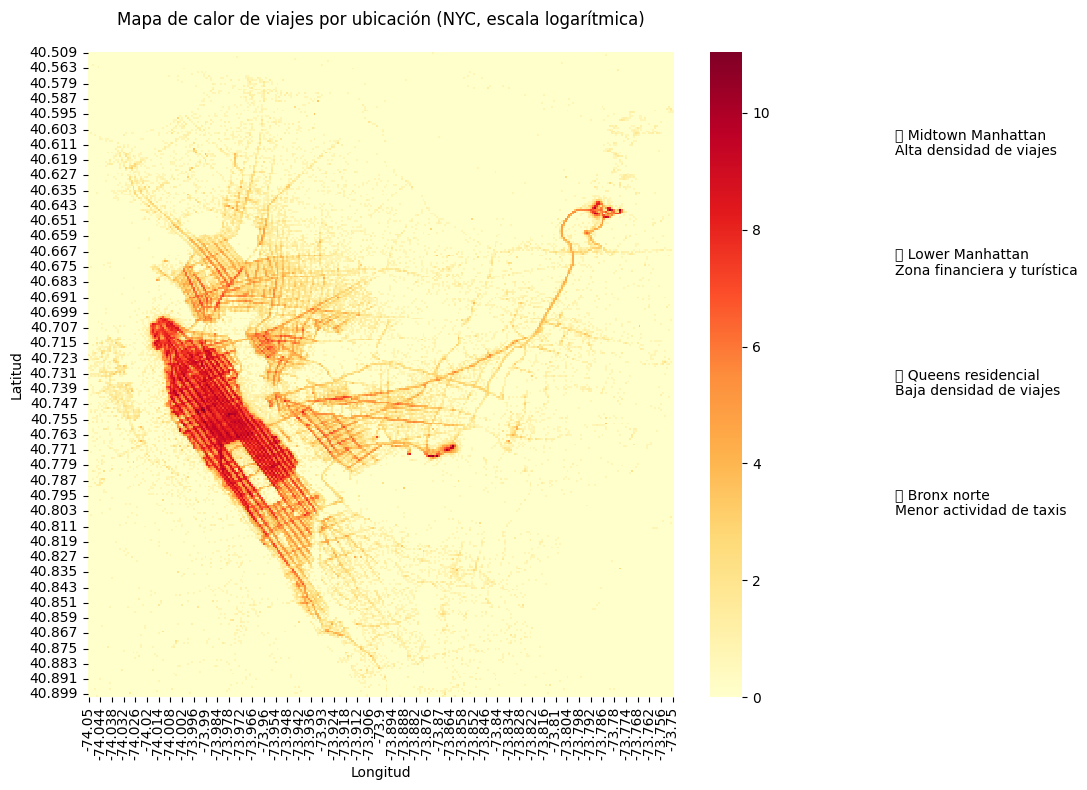

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Verificar que el archivo existe
data_path = os.path.join('..', 'data', 'cleaned_data.csv')
if not os.path.exists(data_path):
    raise FileNotFoundError(f"No se encontró el archivo: {data_path}")

# Cargar el dataset limpio
df = pd.read_csv(data_path)

# 🔹 Filtro geográfico para cubrir toda NYC
mask = (
    (df['pickup_latitude'] > 40.5) & (df['pickup_latitude'] < 40.9) &
    (df['pickup_longitude'] > -74.05) & (df['pickup_longitude'] < -73.75)
)

df_filtered = df.loc[mask].copy()

# 🔹 Redondear coordenadas
df_filtered['lat_round'] = df_filtered['pickup_latitude'].round(3)
df_filtered['lon_round'] = df_filtered['pickup_longitude'].round(3)

# Agrupar por cuadrante
heatmap_data = df_filtered.groupby(['lat_round', 'lon_round']).size().reset_index(name='counts')
heatmap_pivot = heatmap_data.pivot_table(
    index='lat_round',
    columns='lon_round',
    values='counts',
    fill_value=0
)
heatmap_data.to_csv('../data/heatmap_counts.csv', index=False)

# Escala logarítmica
heatmap_pivot_log = np.log1p(heatmap_pivot)

# Crear carpeta
os.makedirs('visualizations', exist_ok=True)

# 🔸 Graficar con espacio blanco para anotaciones
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_pivot_log, cmap='YlOrRd', ax=ax)

# 🔸 Anotaciones externas (ajustadas al margen)
fig.text(0.75, 0.80, '🔴 Midtown Manhattan\nAlta densidad de viajes', fontsize=10, color='black')
fig.text(0.75, 0.65, '🔴 Lower Manhattan\nZona financiera y turística', fontsize=10, color='black')
fig.text(0.75, 0.50, '🟡 Queens residencial\nBaja densidad de viajes', fontsize=10, color='black')
fig.text(0.75, 0.35, '🟡 Bronx norte\nMenor actividad de taxis', fontsize=10, color='black')

# Título y etiquetas
plt.title('Mapa de calor de viajes por ubicación (NYC, escala logarítmica)', pad=20)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout(rect=[0, 0, 0.7, 1])  # Reservar espacio a la derecha
plt.savefig('../visualizations/heatmap_nyc_log_annotated_clean.png')
plt.show()